In [54]:
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink

In [58]:
# В URDF, единицы измерения являются метры и радианы 
robot_chain = Chain(name='robot_arm', links=[
    # База, которая может вращаться вокруг оси Z
    URDFLink(
        name="base",
        bounds=(0, 3.14),
        origin_translation=[0, 0, 0],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 1],
    ),
    # Первое звено (соединение с базой, плечо)
    URDFLink(
        name="shoulder",
        bounds=(0, 3.14),
        origin_translation=[0, 0, 0.02],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Второе звено (локоть)
    URDFLink(
        name="elbow",
        bounds=(0, 3.14),
        origin_translation=[0, 0, 0.105],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Третье звено (запястье)
    URDFLink(
        name="wrist",
        bounds=(0, 3.14),
        origin_translation=[0, 0, 0.096],
        origin_orientation=[0, 0, 0],
        rotation=[0, 1, 0],
    ),
    # Четвертое звено (крутит захват)
    URDFLink(
        name="wrist_rotational",
        bounds=(0, 3.14),
        origin_translation=[0, 0, 0.065],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 0],
    ),
    # Манипулятор (захват)
    URDFLink(
        name="gripper",
        bounds=(-1.57, 1.57),
        origin_translation=[0, 0, 0.11],
        origin_orientation=[0, 0, 0],
        rotation=[0, 0, 0],
    )
])

Передом считаем где перед манипулятором металическая платформа

pwm 10 = 90, значит вправо будет уменьшение угла, влево увеличение
pwm 11 = 115, значит наклон вперед будет уменьшение угла, назад увеличение
pwm 12 = 98, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 13 = 74, значит наклон вперед будет увеличение угла, назад уменьшение
pwm 14 = 90, значит поворот клешни влевл будет увеличение угла, вправо уменьшение
pwm 15 = 142, закрытый - уменьшаем угл открываем

In [56]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

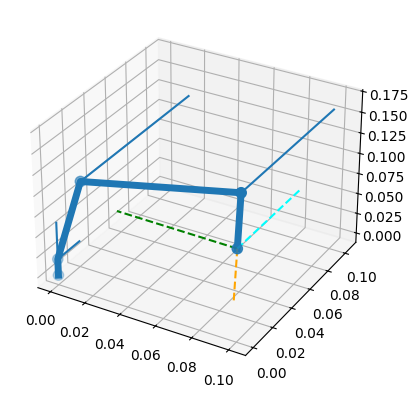

In [59]:
ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')

robot_chain.plot(robot_chain.inverse_kinematics([0.1, 0.0, 0.1]), ax, show=False)
matplotlib.pyplot.show()

In [50]:
robot_chain.inverse_kinematics([0.1, 0.0, 0.1])

array([4.22800248e-10, 1.00000000e-10, 1.00000000e-10, 1.00000000e-10])

In [9]:
robot_chain.links[0]

URDF Link base :
    Type : revolute
    Bounds : (0, 3.14)
    Origin Translation : [0 0 0]
    Origin Orientation : [0 0 0]
    Rotation : [0 0 1]
    Translation: None